In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('po1_data.txt', header=None)


In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1040 entries, 0 to 1039
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1040 non-null   int64  
 1   1       1040 non-null   float64
 2   2       1040 non-null   float64
 3   3       1040 non-null   float64
 4   4       1040 non-null   float64
 5   5       1040 non-null   float64
 6   6       1040 non-null   float64
 7   7       1040 non-null   float64
 8   8       1040 non-null   float64
 9   9       1040 non-null   float64
 10  10      1040 non-null   float64
 11  11      1040 non-null   float64
 12  12      1040 non-null   float64
 13  13      1040 non-null   float64
 14  14      1040 non-null   float64
 15  15      1040 non-null   float64
 16  16      1040 non-null   float64
 17  17      1040 non-null   float64
 18  18      1040 non-null   float64
 19  19      1040 non-null   float64
 20  20      1040 non-null   int64  
 21  21      1040 non-null   int64  
 22  

In [4]:
df[df[28]].describe()

,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
count,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,1040.000000,...,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000,1040.00000
mean,2.679523,2.679523,2.679523,2.679523,2.679523,2.679523,2.679523,2.679523,2.679523,2.679523,...,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000
std,1.765053,1.765053,1.765053,1.765053,1.765053,1.765053,1.765053,1.765053,1.765053,1.765053,...,11.54895,11.54895,11.54895,11.54895,11.54895,11.54895,11.54895,11.54895,11.54895,11.54895
min,0.190000,0.190000,0.190000,0.190000,0.190000,0.190000,0.190000,0.190000,0.190000,0.190000,...,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
25%,1.507500,1.507500,1.507500,1.507500,1.507500,1.507500,1.507500,1.507500,1.507500,1.507500,...,10.75000,10.75000,10.75000,10.75000,10.75000,10.75000,10.75000,10.75000,10.75000,10.75000
50%,2.396000,2.396000,2.396000,2.396000,2.396000,2.396000,2.396000,2.396000,2.396000,2.396000,...,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000,20.50000
75%,3.411500,3.411500,3.411500,3.411500,3.411500,3.411500,3.411500,3.411500,3.411500,3.411500,...,30.25000,30.25000,30.25000,30.25000,30.25000,30.25000,30.25000,30.25000,30.25000,30.25000
max,14.376000,14.376000,14.376000,14.376000,14.376000,14.376000,14.376000,14.376000,14.376000,14.376000,...,40.00000,40.00000,40.00000,40.00000,40.00000,40.00000,40.00000,40.00000,40.00000,40.00000


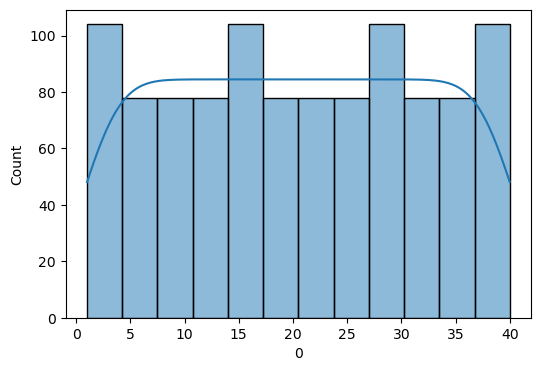

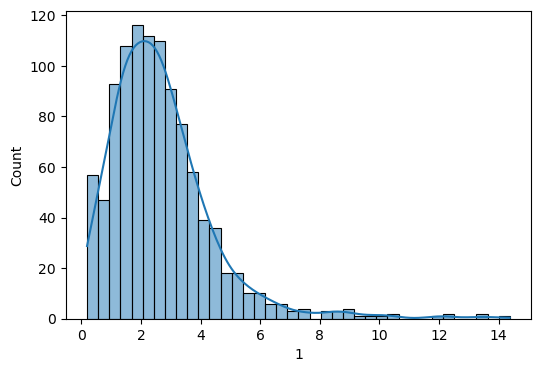

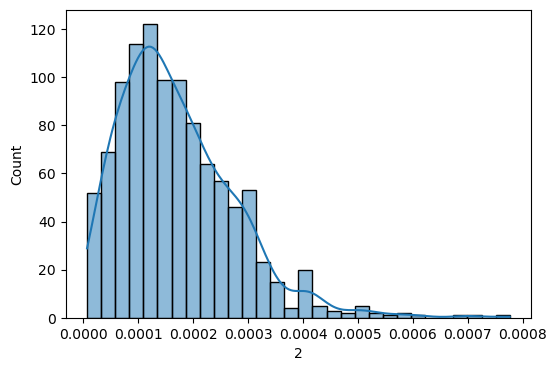

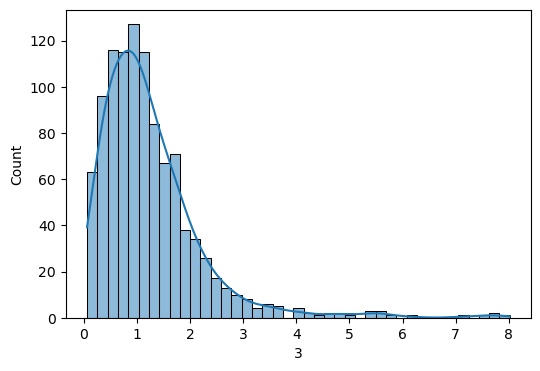

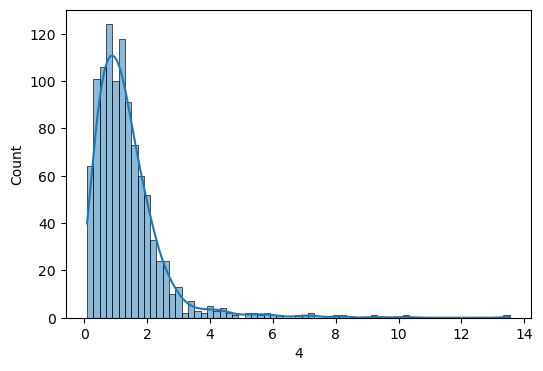

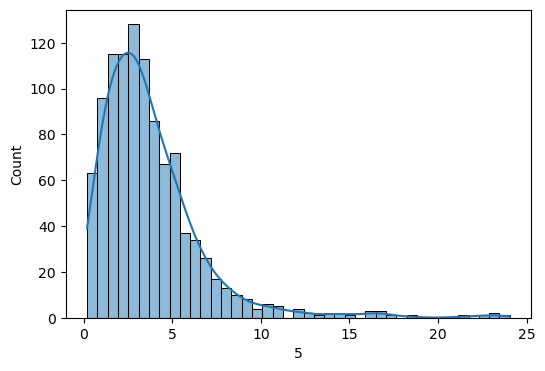

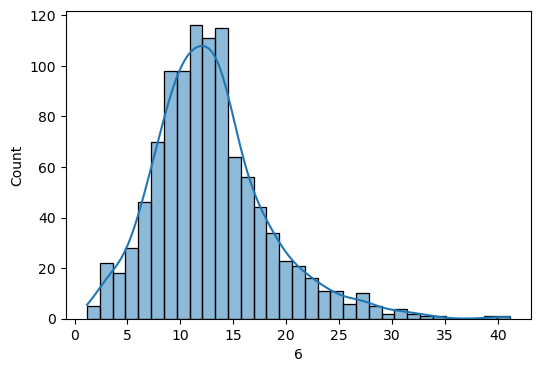

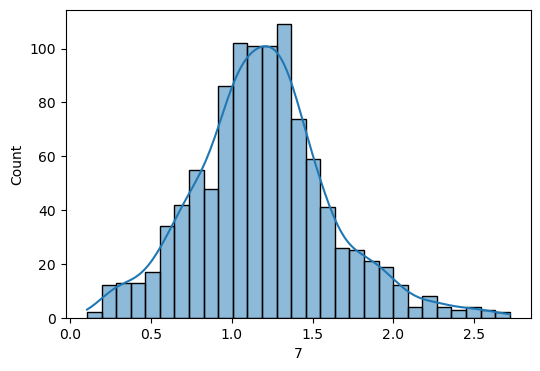

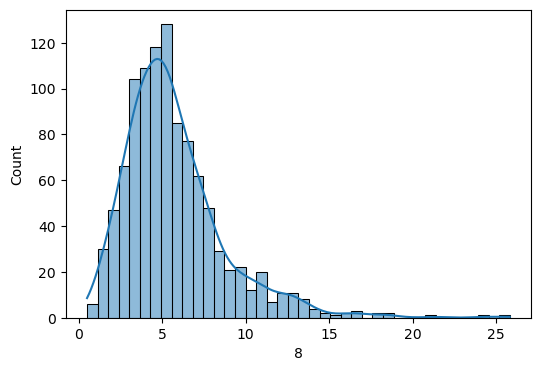

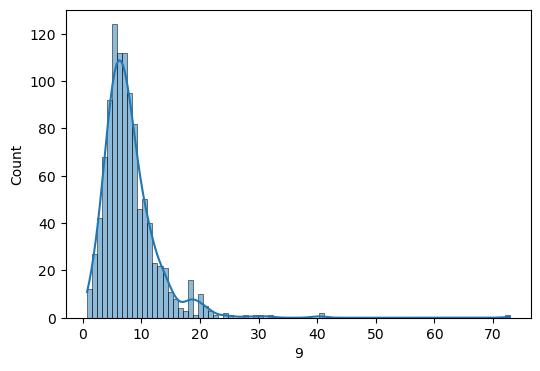

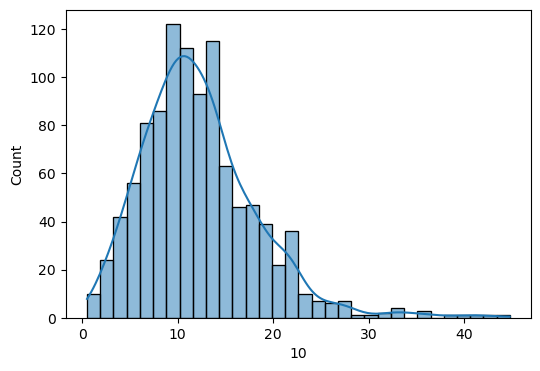

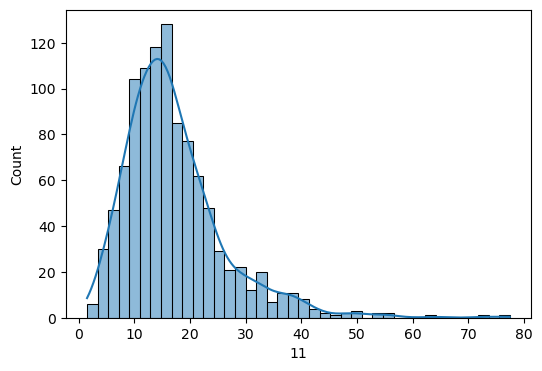

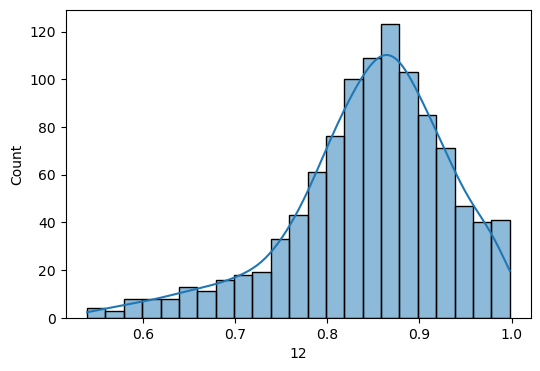

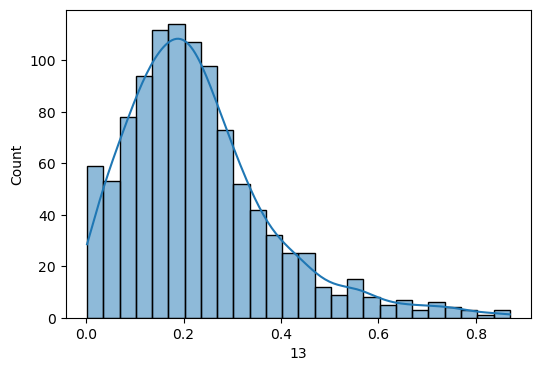

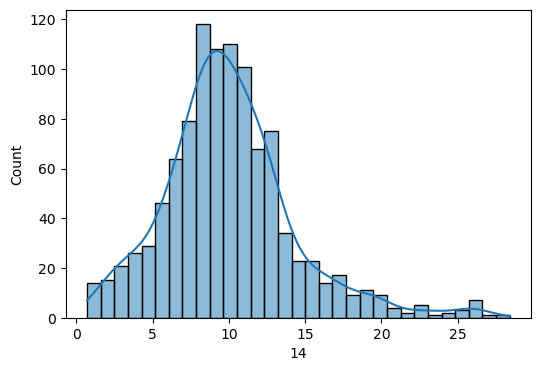

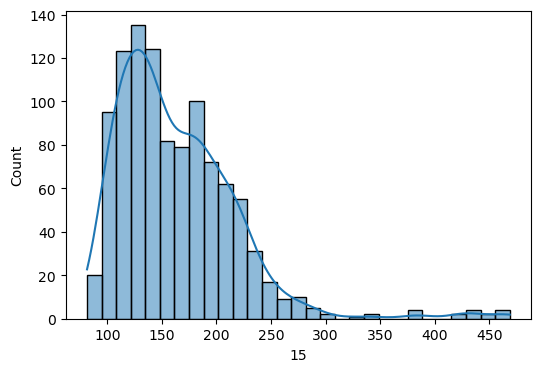

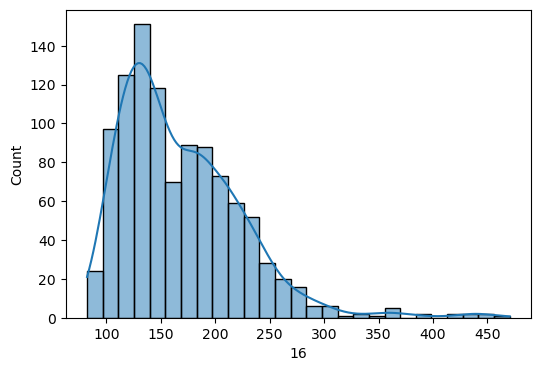

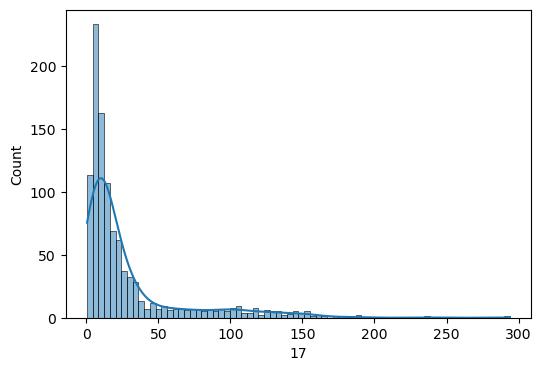

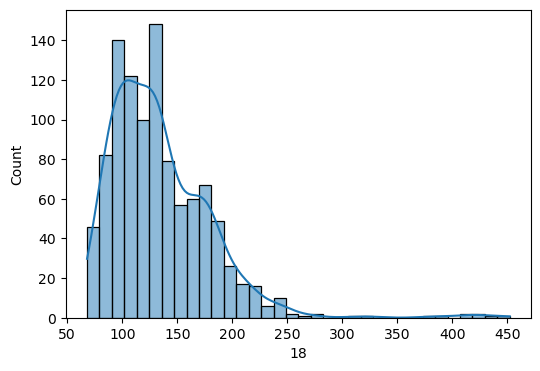

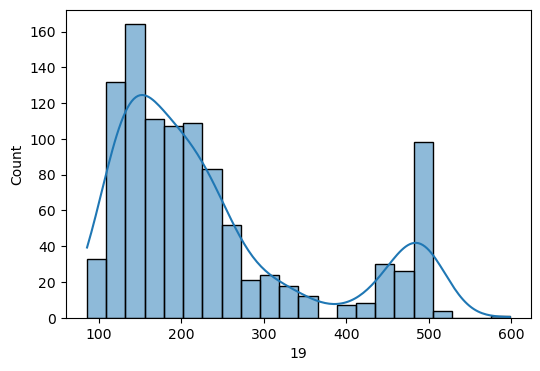

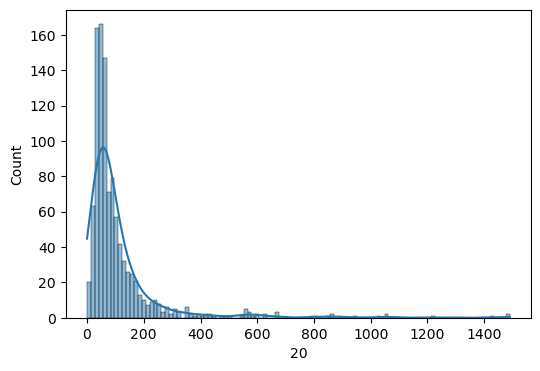

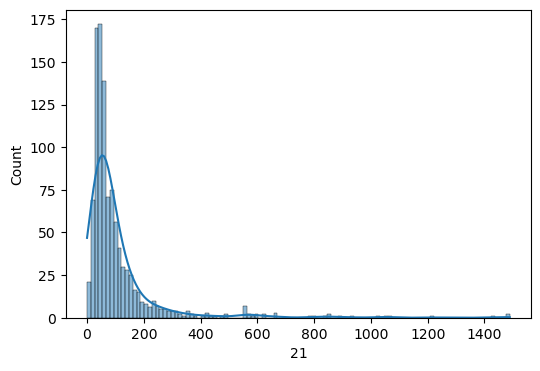

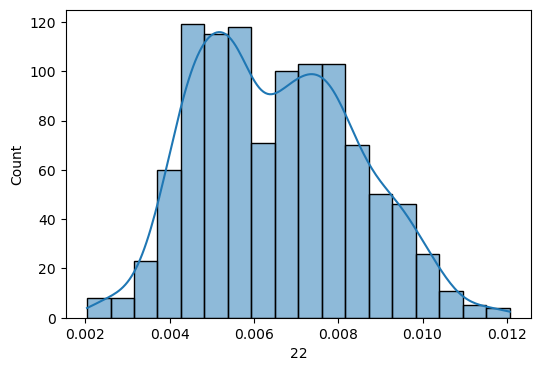

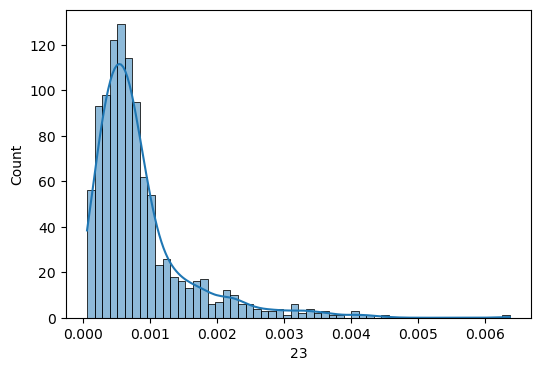

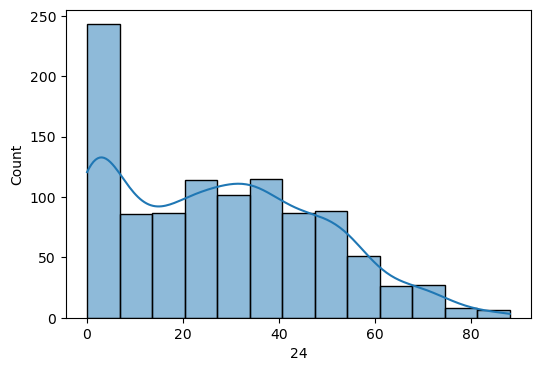

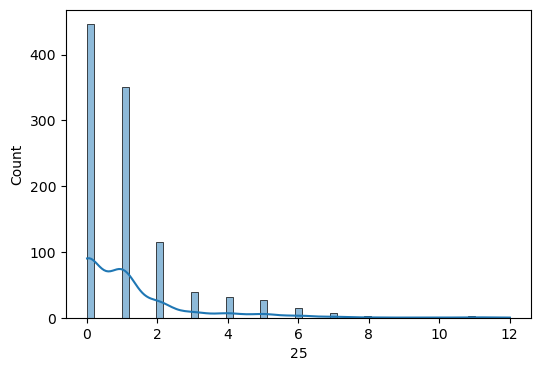

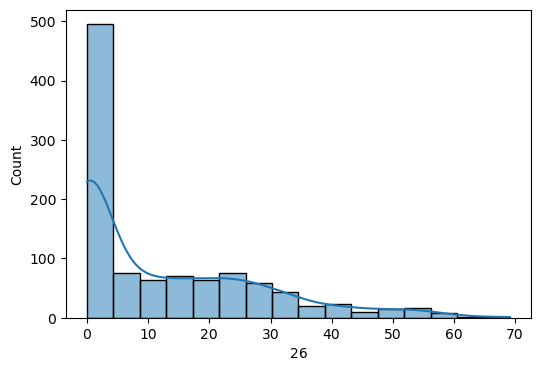

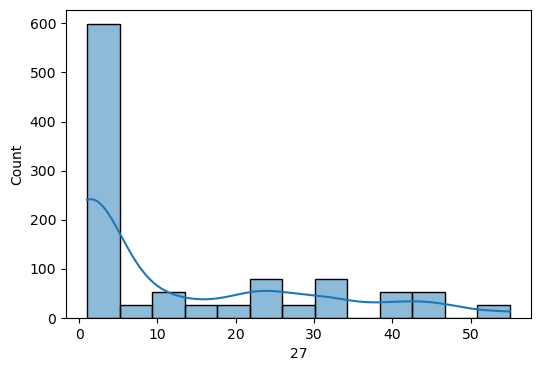

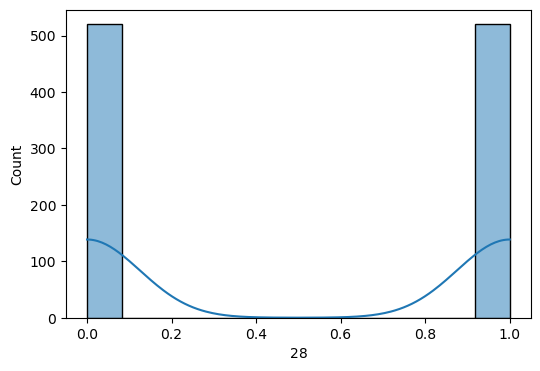

In [5]:
for column in df.columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=df, x=column, kde=True)
    plt.show()

In [11]:
import math
from scipy.stats import norm

def hypothesisTesting(df, column_name, column_stirng_name, significance_level=0.08):
    M_mean = df.loc[df[28] == 0, column_name].mean()
    F_mean = df.loc[df[28] == 1, column_name].mean()
    M_std = df.loc[df[28] == 0, column_name].std()
    F_std = df.loc[df[28] == 1, column_name].std()
    def twoSampMethod(X1, X2, mudiff, sd1, sd2, n1, n2):
        pooledSE = math.sqrt(sd1**2 / n1 + sd2**2 / n2)
        z = ((X1 - X2) - mudiff) / pooledSE
        pval = 2 * (1 - norm.cdf(abs(z)))
        return round(z, 3), pval
    z, p = twoSampMethod(M_mean, F_mean, 0, M_std, F_std)

    null_hypothesis = f"There is no significant difference between the mean"
    alternate_hypothesis = f"There is a significant difference between the mean"    
    if p < significance_level:
        pass
        print("We reject the null hypothesis")
    else:
        print("We accept the null hypothesis")

In [9]:
hypothesisTesting(df, 1, 'First Column')
hypothesisTesting(df, 4, 'Second Column')
hypothesisTesting(df, 8, 'Third Column')

We reject the null hypothesis
We reject the null hypothesis
We accept the null hypothesis


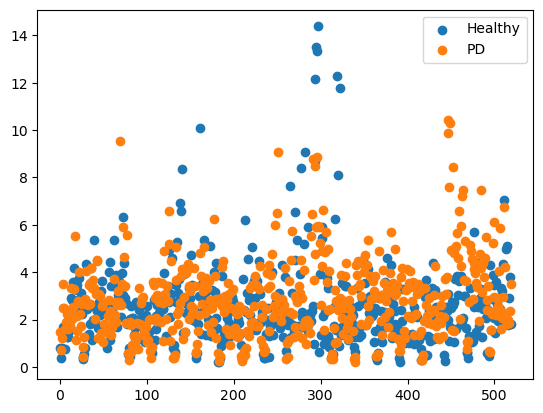

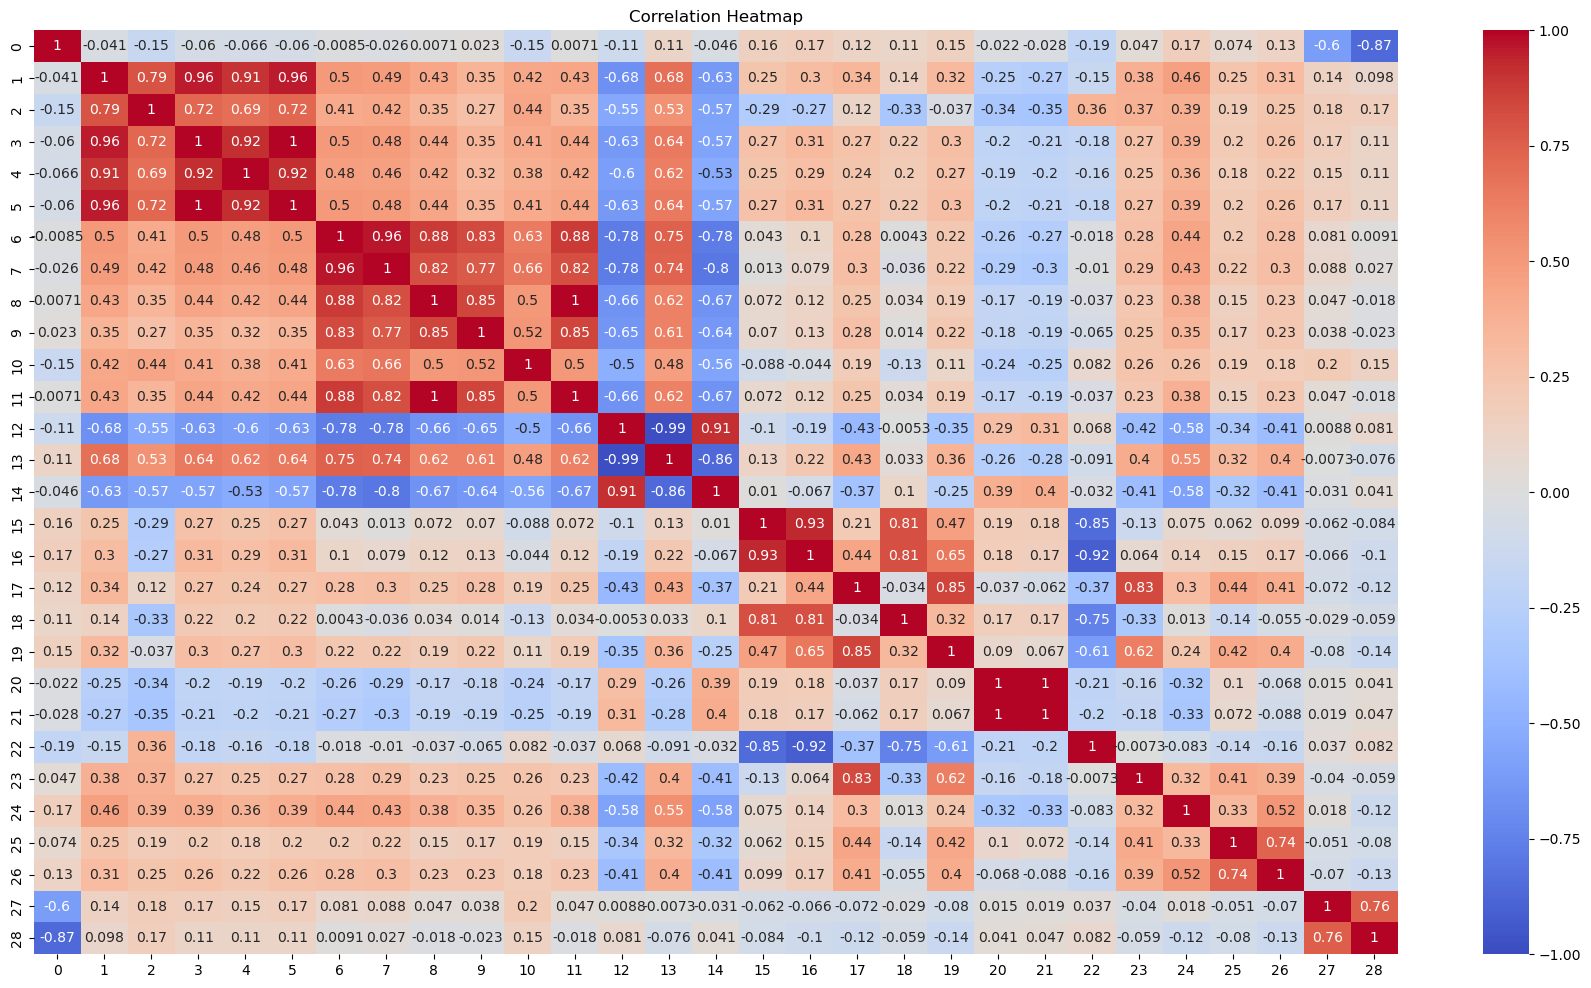

In [14]:
X, y = df.drop(28,axis=1), df[28]
X[28] = y
# Calculate correlation matrix
corr_matrix = X.corr()

# Set up the matplotlib figure
plt.figure(figsize=(22, 12))

# Create a heatmap using seaborn
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Add a title
plt.title('Correlation Heatmap')

# Display the plot
plt.show()
